# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, auc, roc_auc_score

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
sns.set_style('darkgrid')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-nov-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-nov-2021/train.csv
/kaggle/input/tabular-playground-series-nov-2021/test.csv


# Load Data

In [2]:
train = pd.read_csv('../input/tabular-playground-series-nov-2021/train.csv')
test = pd.read_csv('../input/tabular-playground-series-nov-2021/test.csv')
submit = pd.read_csv('../input/tabular-playground-series-nov-2021/sample_submission.csv')

In [3]:
train.head(10)

id        f0        f1         f2       f3        f4        f5        f6  \
0   0  0.106643  3.594370  132.80400  3.18428  0.081971  1.188590  3.732380   
1   1  0.125021  1.673360   76.53360  3.37825  0.099400  5.093660  1.275620   
2   2  0.036330  1.497470  233.54600  2.19435  0.026914  3.126940  5.056870   
3   3 -0.014077  0.246000  779.96700  1.89064  0.006948  1.531120  2.698000   
4   4 -0.003259  3.715420  156.12800  2.14772  0.018284  2.098590  4.154920   
5   5  0.026798  0.801415  136.59800  2.35950  0.046621  2.949720  3.501930   
6   6  0.940176  4.301660  835.78500  4.65820 -0.012422  2.728400  1.896610   
7   7  0.496696  3.502990    9.41337  2.30188 -0.001476  1.004410  4.955720   
8   8 -0.007282  3.957490  124.70400  2.24207  0.022056  0.250706  1.454410   
9   9  0.398484  3.522350  -78.56650  4.62125  0.092171  2.856370  0.073714   

         f7        f8        f9       f10       f11       f12       f13  \
0  2.266270  2.099590  0.012330  1.607190 -0.318058  0.560137  2.806880   
1 -0.471318  4.545940  0.037706  0.331749  0.325091  0.062040  2.262150   
2  3.849460  1.801870  0.056995  0.328684  2.968810  0.105244  2.069490   
3  4.517330  4.503320  0.123494  1.002680  4.869600  0.058411  2.497850   
4 -0.038236  3.371450  0.034166  0.711483  0.769988  0.057555  0.957257   
5  0.694882  1.848460  0.097730  2.125770  4.509310  0.138280 -0.059260   
6  0.501663  1.822280  0.036901  2.345700  2.855690  0.137920  3.202970   
7  1.496060  2.499600  0.066127  0.398973  3.913280  0.008415  4.147150   
8 -0.338266  0.710145  0.096573  0.923477  3.118340  1.268760  4.819100   
9  1.042290  1.583210  0.118856  2.384710  2.935010  0.220056  3.333250   

       f14       f15       f16       f17       f18       f19       f20  \
0  1.35114  2.535930  0.197527  0.676494  1.989790 -3.842450  0.037380   
1  4.33943 -0.224999  0.233586  3.381280  1.902990  0.067874 -0.051268   
2  5.30986  1.354790 -0.262018  1.379080  1.480910  0.020542 -0.008806   
3  1.23843  2.348360  0.175475  1.608890  2.028810  0.042086  0.005141   
4  3.71145  5.464350  0.287104  2.616950  1.384030  0.074883 -0.010543   
5  4.46356  1.682450  0.054934  1.486670  4.953620 -0.232102 -0.008823   
6  4.86547  0.887951  0.043810  1.708430  2.840970 -0.033771  0.049529   
7  2.02542  2.744350  0.323818  3.281390  0.402024  0.098563  0.072819   
8  5.23261  4.633850  0.134979  4.437100  2.574430  0.096927  0.070672   
9  2.28433  4.404170 -0.018339  4.094710  4.118070  0.030315  0.109294   

        f21       f22       f23       f24      f25       f26       f27  \
0  0.230322  3.330550  0.009397  0.144738  3.05131  1.303620  0.033225   
1  0.006135  2.604440  0.103441  0.067638  4.75362  1.855520 -0.181834   
2  0.109348  1.683650  0.038180  0.123716  1.11248  3.571660  0.120601   
3  0.076506  1.651220  0.111813  0.121641  0.58912  4.236920 -0.032843   
4  0.109121  2.276020  0.008023  0.045235  4.35954  5.075620 -0.009376   
5  0.090408  0.928475 -0.044461  0.117378  1.43215  0.437818  0.191585   
6  0.062809  3.767600  0.009853  0.069568  1.42545  1.796910  0.302609   
7  0.038898  3.741090  0.118529  0.069689  1.26214  0.401026 -0.085859   
8  0.045277  4.983230  0.071195  0.723740  2.95475  1.021020  0.055262   
9  0.024620  1.564590  0.086058  0.112959  3.77206  1.536800  0.047551   

        f28       f29       f30       f31       f32       f33       f34  \
0 -0.018284  2.748210 -0.009294 -0.036271 -0.049871  0.019484  3.898460   
1  0.008359  3.166340  0.011850  0.022292  0.069320  0.117109  0.315276   
2  0.082069  2.233520  0.002270  0.045182  0.014405  0.011599 -0.502849   
3  0.058168  0.712927  0.097465  0.072744  0.000324  0.063362  4.063820   
4  0.528966  4.053350  0.020000  0.106828  0.051307  0.045939  3.402460   
5  0.223433  0.162156  0.046938  0.074192  0.010365  0.019538  0.982631   
6  0.137927  2.724750  0.125300  0.055290  0.144820  0.020985  1.298330   
7  0.266387  1.652560  0.138597  0.044235  3.604570  0.091343  3.417110   
8 

In [4]:
test.head(10)

id        f0        f1       f2        f3        f4        f5  \
0  600000  0.003229  4.838660  585.529  2.282910  0.713180  3.907830   
1  600001  0.008602  0.505536 -100.099  3.012670  0.027199  1.194610   
2  600002  1.461000  2.437260 -112.964  3.541230  0.752338  4.338310   
3  600003  0.140556  3.085610  179.451  0.573945  0.057342  2.216790   
4  600004  0.128876  5.199760  107.466 -0.497149  0.080220  0.458121   
5  600005  0.075182  0.641559  456.048  2.976940  1.200620  3.561660   
6  600006  0.117936  0.759564  338.007  4.578690  0.119421  3.645510   
7  600007  0.036017 -0.025442  221.039  2.318040 -0.019422  1.502590   
8  600008  0.664511  1.896650  144.740  5.430480  0.015642  4.139480   
9  600009  0.297412 -0.031843  580.144  1.229220  0.222956  0.347011   

         f6        f7        f8        f9       f10       f11       f12  \
0  0.480696  1.482270  4.891810  0.056351  4.200990  3.151800  0.000349   
1  5.036620  2.517440  4.553890  0.063876  0.337257  4.439690  0.013188   
2  1.648080  4.699910  1.950250  0.005303  2.071680  0.546499  0.141781   
3  1.623480  0.526174  1.542540 -0.026160  1.609440  1.723560 -0.019564   
4  0.629839  5.240460 -0.232279  0.030006  0.481359  2.176020  0.193162   
5  3.408070  1.689610  5.548330  0.508489  2.681810  3.713100 -0.004181   
6 -0.498662  0.170522  4.798830 -0.015315  4.888380  0.853047  0.445236   
7  3.112720  4.464700  4.488760 -0.108331  3.957320  4.207560  0.118088   
8  3.407920 -0.003069  0.147484 -0.011280  2.733050  5.670700  0.139642   
9  2.346240  1.506180  1.225150  0.060331  2.079760  3.434160  0.129071   

        f13       f14       f15       f16       f17       f18       f19  \
0  1.851160  2.638890  0.746668 -0.004756  1.610300  4.114820 -0.077756   
1  3.379010  3.384700  1.167400  2.246550  1.750170  2.766240 -0.058501   
2  1.673170  4.306490  1.702330 -0.062869  1.619230  4.190530  0.055140   
3  1.552130  4.832640  1.501640  0.192669  4.614890  1.470690 -0.010031   
4  1.392090  2.518900  2.993170  4.170910  0.318375  4.845630  0.085064   
5  3.168340  2.284450  3.830750 -0.110091  3.141860  1.403710 -0.056459   
6  3.087800  3.461150  4.749110  0.103544  3.923630  2.179700  0.006892   
7  4.907590  3.695860  3.251410 -0.206622 -0.426359  3.248820  0.079070   
8  1.257790  0.874942  3.949670  0.025787 -0.025617  3.613840  0.012371   
9 -0.096486  0.918614  4.843560  1.040280  0.909375  0.203543  0.086855   

        f20       f21       f22       f23       f24       f25       f26  \
0  0.129446  0.053324  0.416789  0.445009  0.150464  5.021300  2.221390   
1  0.012595  0.036144  0.769057  0.017496  0.050283  0.324697  4.948640   
2 -0.016590  0.017805  3.064810  0.070370  0.098316  3.507540  1.069100   
3  0.072805  0.048035  3.230210 -0.031548  0.028697  3.752520  4.948470   
4  0.026443 -0.004559  0.120327 -0.008630  0.004495  4.921700  1.685640   
5  0.089100 -0.005814  4.040360  0.036553  0.083170  3.585910  4.045040   
6  0.124681  0.072526  3.581170  0.074286  0.021384  5.655550  1.586170   
7  0.111552  0.061941  4.347620  0.029120  0.073778  1.335750 -0.142287   
8  0.154551  0.016216  3.733420  0.310316  0.621920  1.611350  2.097970   
9 -0.001379 -0.006598  1.765910  0.777861  0.073230  4.642320  3.188250   

        f27       f28       f29       f30       f31       f32       f33  \
0 -0.072333 -0.215874  1.562360  0.074881  0.010050  0.018582  0.067466   
1  0.124789  0.347128  1.245120  0.035822 -0.013188  0.023194  0.006444   
2  0.012750  0.009981  3.467810  0.035920 -0.009804  0.065728 -0.004725   
3 -0.174542 -0.033491  2.478230  0.068129  0.090797  0.029877  0.146718   
4  0.095628  0.189131  2.569550  0.046643  0.111462  0.002912  0.060737   
5  0.186592  0.167221  2.021000  0.085029 -0.041341  0.366322  0.025960   
6 -0.048649  0.147190  1.676160  0.077235 -0.057609  0.105936  0.085153   
7  0.042368  1.592350  1.460340  0.059698  0.114616  0.555017  0.043109   
8  0.085016  0.033890  0.280386  0.093829  0.011413  0.157390

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Columns: 102 entries, id to target
dtypes: float64(100), int64(2)
memory usage: 466.9 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540000 entries, 0 to 539999
Columns: 101 entries, id to f99
dtypes: float64(100), int64(1)
memory usage: 416.1 MB


In [7]:
print(train.shape)
print(test.shape)

(600000, 102)
(540000, 101)


In [8]:
train.isnull().sum()

id        0
f0        0
f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
f15       0
f16       0
f17       0
f18       0
f19       0
f20       0
f21       0
f22       0
f23       0
f24       0
f25       0
f26       0
f27       0
f28       0
f29       0
f30       0
f31       0
f32       0
f33       0
f34       0
f35       0
f36       0
f37       0
f38       0
f39       0
f40       0
f41       0
f42       0
f43       0
f44       0
f45       0
f46       0
f47       0
f48       0
f49       0
f50       0
f51       0
f52       0
f53       0
f54       0
f55       0
f56       0
f57       0
f58       0
f59       0
f60       0
f61       0
f62       0
f63       0
f64       0
f65       0
f66       0
f67       0
f68       0
f69       0
f70       0
f71       0
f72       0
f73       0
f74       0
f75       0
f76       0
f77       0
f78       0
f79       0
f80       0
f81       0
f82 

In [9]:
train.duplicated().sum()

0

In [10]:
train.corr()

id        f0        f1        f2        f3        f4        f5  \
id      1.000000 -0.019128 -0.000611  0.049249 -0.024055 -0.042858  0.101671   
f0     -0.019128  1.000000  0.005288 -0.002627 -0.003714  0.013101 -0.002081   
f1     -0.000611  0.005288  1.000000  0.009679 -0.014078 -0.001013  0.008854   
f2      0.049249 -0.002627  0.009679  1.000000 -0.002295 -0.015797  0.011925   
f3     -0.024055 -0.003714 -0.014078 -0.002295  1.000000 -0.010610 -0.021345   
f4     -0.042858  0.013101 -0.001013 -0.015797 -0.010610  1.000000  0.000774   
f5      0.101671 -0.002081  0.008854  0.011925 -0.021345  0.000774  1.000000   
f6     -0.000429 -0.004594  0.004880 -0.000030  0.000324 -0.004948  0.015864   
f7      0.068104 -0.003715 -0.002326 -0.004807  0.000108 -0.001994  0.008899   
f8     -0.036948 -0.007836  0.020885  0.006432 -0.003198  0.000292 -0.022035   
f9     -0.049080  0.005646  0.008804  0.008650  0.000145 -0.000414 -0.004322   
f10     0.033262  0.002234 -0.003515 -0.009768 -0.026799  0.017029 -0.009612   
f11     0.039061 -0.002924 -0.010084  0.002474  0.004851  0.003465  0.011905   
f12    -0.030369  0.006718 -0.004778 -0.005440  0.015761  0.004715 -0.004814   
f13     0.043643 -0.002785 -0.005823  0.005234 -0.004755  0.003818  0.002170   
f14    -0.074552  0.004292  0.024384  0.004770  0.015506 -0.003718 -0.002715   
f15     0.001619  0.000858 -0.008691 -0.008067  0.003393  0.003453  0.003196   
f16    -0.006087  0.004042  0.005806 -0.001369  0.010657  0.002867  0.004429   
f17     0.038540 -0.003682 -0.000673  0.011555  0.006050 -0.005095  0.008565   
f18    -0.020100 -0.001921  0.009432  0.005131 -0.002257 -0.001011  0.015201   
f19     0.003576  0.004443  0.015031  0.000561 -0.004663  0.002460  0.005111   
f20     0.003266  0.003922 -0.004382 -0.003984 -0.007579  0.017793 -0.004503   
f21    -0.030268 -0.001238 -0.020804 -0.001491  0.017423 -0.006636  0.004888   
f22     0.008106  0.010561  0.012642  0.008070  0.015473 -0.008212  0.000013   
f23    -0.065755 -0.000637  0.003971 -0.002964  0.004567 -0.000905 -0.005613   
f24     0.061146  0.005677 -0.005567  0.007311  0.001448 -0.003094  0.012528   
f25    -0.042891  0.001909 -0.003607  0.002558  0.012962 -0.009884  0.004352   
f26     0.001017  0.003268 -0.008912  0.010318 -0.010008 -0.000332  0.005698   
f27     0.086378  0.003832  0.007630  0.002918 -0.024581  0.002126  0.005191   
f28     0.020766  0.002745 -0.007839  0.003852 -0.007732  0.005892  0.003907   
f29     0.046551 -0.003134  0.000689  0.000808  0.003158 -0.002466  0.003942   
f30    -0.017292  0.006673  0.009271  0.001632 -0.000006  0.002968 -0.001840   
f31    -0.028428  0.001717 -0.000344 -0.002425  0.008797  0.001466 -0.009025   
f32    -0.003178  0.000744 -0.008317 -0.002239 -0.001557  0.004570  0.005857   
f33     0.040842  0.003958  0.010757  0.008527 -0.005556  0.000713  0.007358   
f34     0.018688  0.011544  0.007874 -0.011981 -0.004799  0.018868 -0.006896   
f35     0.017615 -0.000315 -0.008703  0.000999 -0.005294  0.004790  0.004589   
f36    -0.046295 -0.006177  0.008148  0.000182 -0.006808  0.007752 -0.015662   
f37     0.009107 -0.004744 -0.003953 -0.008075 -0.006355  0.003167 -0.021720   
f38     0.045745 -0.011909 -0.012434  0.006801  0.004039 -0.001262  0.002454   
f39    -0.039057  0.006576  0.002225  0.001346  0.001222  0.012745 -0.004213   
f40    -0.007070 -0.006622  0.007310  0.010900 -0.005592  0.009064  0.007596   
f41    -0.026966 -0.005341 -0.007664 -0.005148  0.003979  0.007044 -0.006515   
f42     0.051584 -0.004674 -0.010241  0.005309  0.009746 -0.003347  0.002869   
f43     0.109330 -0.005728 -0.015235  0.000166 -0.002357  0.001266 -0.004156   
f44     0.013634 -0.003039 -0.006444 -0.010166 -0.010904  0.018505 -0.011079   
f45     0.092434  0.004594 -0.004820  0.013317 -0.006898 -0.000967 -0.004841   
f46    -0.007537 -0.001582 -0.002047  0.006795  0.003877 -0.003787  0.000418   
f47     0.002141  0.001468  0.014301  0.013710 -0.006450 -0.020226  0.018761   
f48    -0.0130

In [11]:
train.describe()

id             f0             f1             f2  \
count  600000.000000  600000.000000  600000.000000  600000.000000   
mean   299999.500000       0.306508       2.497590     306.644536   
std    173205.225094       0.522450       1.554018     551.743893   
min         0.000000      -3.797450      -1.223960   -1842.530000   
25%    149999.750000       0.026222       1.186238      43.573400   
50%    299999.500000       0.097788       2.516500     133.626000   
75%    449999.250000       0.397184       3.787630     302.262250   
max    599999.000000       8.781500       6.226720    6119.280000   

                  f3             f4             f5             f6  \
count  600000.000000  600000.000000  600000.000000  600000.000000   
mean        2.647901       0.177850       2.556832       2.699650   
std         1.544529       0.417488       1.562527       1.564000   
min        -1.368560      -3.206210      -1.169770      -1.059310   
25%         1.442028       0.019709       1.261038       1.385820   
50%         2.634130       0.061586       2.590425       2.801255   
75%         3.907640       0.112712       3.813662       3.996913   
max         6.521150       8.265470       6.515070       6.586780   

                  f7             f8             f9            f10  \
count  600000.000000  600000.000000  600000.000000  600000.000000   
mean        2.571593       2.538273       0.134370       2.579987   
std         1.549361       1.532988       0.421892       1.604389   
min        -1.281970      -1.242020      -2.577840      -1.309730   
25%         1.333848       1.292163       0.019563       1.205920   
50%         2.557985       2.475880       0.058752       2.527070   
75%         3.823450       3.804360       0.101046       3.956182   
max         6.258770       6.389670       7.078460       6.508760   

                 f11            f12            f13            f14  \
count  600000.000000  600000.000000  600000.000000  600000.000000   
mean        2.759273       0.128958       2.477244       2.662859   
std         1.545217       0.210861       1.517694       1.481966   
min        -1.451570      -0.678145      -1.295160      -1.213890   
25%         1.520750       0.029119       1.278118       1.504670   
50%         2.835400       0.072450       2.435990       2.714870   
75%         4.031055       0.127671       3.682680       3.856412   
max         6.456620       2.361230       6.401460       6.369200   

                 f15            f16            f17            f18  \
count  600000.000000  600000.000000  600000.000000  600000.000000   
mean        2.631040       0.362479       2.483075       2.471319   
std         1.531067       1.346352       1.577456       1.541571   
min        -1.450540     -18.169600      -1.387720      -1.221020   
25%         1.399320      -0.046389       1.132497       1.218018   
50%         2.651025       0.070876       2.504525       2.466690   
75%         3.871417       0.209365       3.775860       3.710730   
max         6.774750      41.469200       6.377910       6.354660   

                 f19            f20            f21            f22  \
count  600000.000000  600000.000000  600000.000000  600000.000000   
mean        0.108097       0.093783       0.062157       2.559781   
std         0.395313       0.308938       0.054796       1.556496   
min        -5.334110      -2.858550      -0.151519      -1.201070   
25%         0.017039       0.018545       0.027432       1.287208   
50%         0.059506       0.056027       0.058257       2.524400   
75%         0.102623       0.094327       0.089365       3.847980   
max        11.687500       8.749520       0.526576       6.306320   

                 f23            f24            f25            f26  \
count  600000.000000  600000.000000  600000.000000  600000.000000   
mean        0.097061       0.141055       2.580093       2.459101   
std         0.333590       0.342377       1.609573       1.567891   
min       

# EDA

<AxesSubplot:xlabel='target', ylabel='count'>

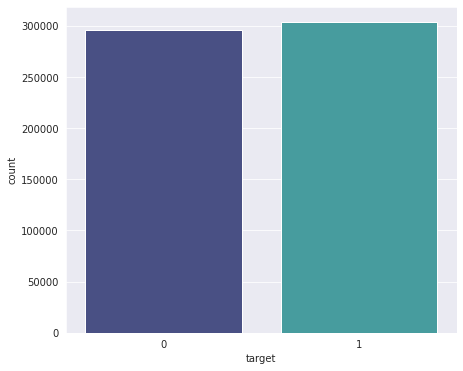

In [12]:
plt.figure(figsize=(7,6))
sns.countplot(x = 'target', data = train, palette="mako")

<AxesSubplot:>

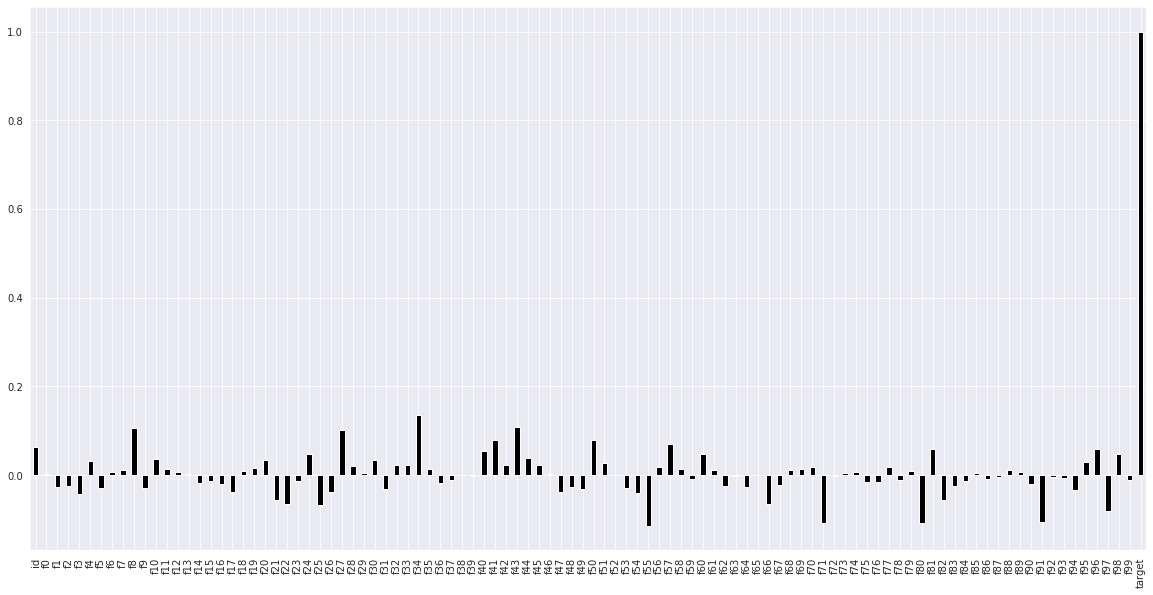

In [13]:
train.corr()["target"].plot(y='target',figsize=(20, 10),kind="bar", color=['black'])

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
         36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
         45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
         54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,
         63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,
         72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,
         81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,
         90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,
         99.5, 100.5, 101.5]),
 [Text(0, 0.5, 'id'),
  Text(0, 1.5, 'f0'),
  Text(0, 2.5, 'f1'),
  Text(0, 3.5, 'f2'),
  Text(0, 4.5, 'f3'),
  Text(0, 5.5, 'f4'),
  Text(0, 6.5, 'f5'),
  Text(0, 7.5, 'f6'),
  Text(0, 8.

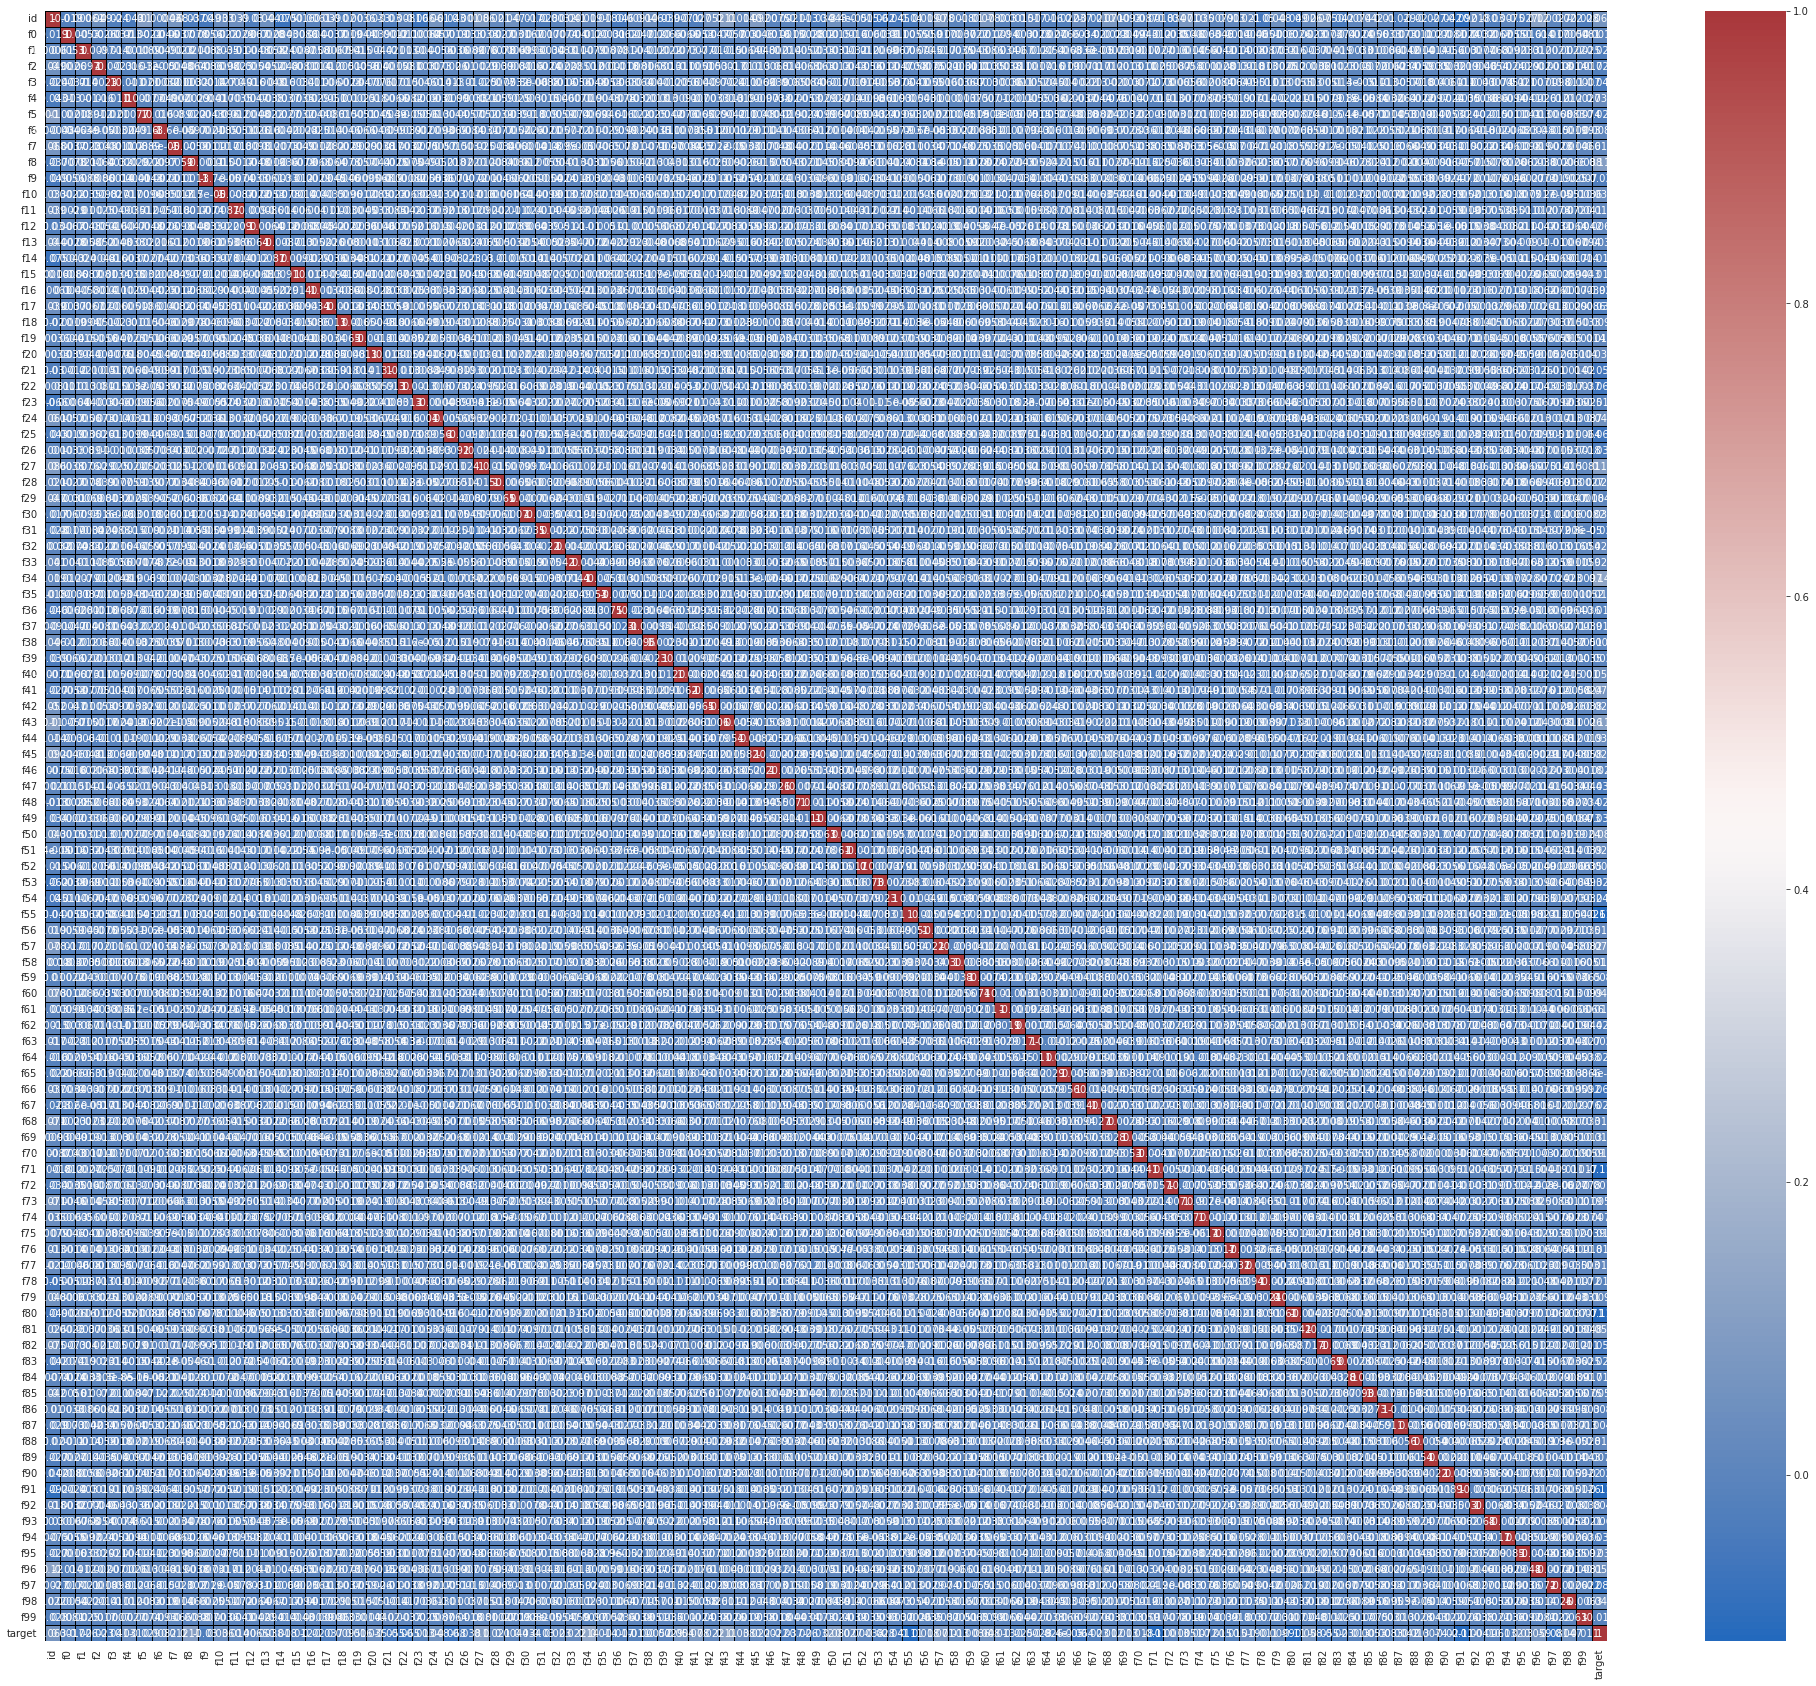

In [14]:
plt.figure(figsize=(35, 30))
sns.heatmap(train.corr(), linewidths = 0.5, linecolor = 'black', annot=True, cmap='vlag')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Prepare Data (train_test_spilt)

In [15]:
test_id = test.loc[:, 'id']
train_target = train.loc[:, 'target']
train.drop(['id', 'target'], axis=1, inplace=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train, train_target, test_size=0.25, shuffle=True, 
                                                    random_state=42)
(X_train.shape, X_test.shape)

((450000, 100), (150000, 100))

# Model Building

In [19]:
def objective(trial):
    
    # Hyperparameters for XGBClassifier
    xgb_params = {
        'random_state': 1, 
        'n_jobs': 3,
        'booster': 'gbtree',
        'eval_metric': 'auc',
        'n_estimators': 5000,
        'learning_rate': 0.05,
        'eta': trial.suggest_loguniform('eta', 1e-8, 1.0),  
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'subsample': trial.suggest_float('subsample', 0.2, 1.),
        'colsample_bytree': trial.suggest_float('colsample_bytree',0.2, 1.),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'use_label_encoder': False,
    }
    
    #K-Fold Split
    skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=42)
    final = []
    
    for train_idx, test_idx in skf.split(X_train, y_train):
        X_train_val, X_test_val = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_train_val, y_test_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
        
        model = XGBClassifier(**xgb_params, tree_method = 'gpu_hist')
        model.fit(
            X_train_val, y_train_val,
            eval_metric='auc',
            early_stopping_rounds = 200,
            eval_set = [(X_test_val, y_test_val)], 
            verbose = 0
        )
        
        pred = model.predict_proba(X_test)
        pred = pred[:, 1]
        final.append(pred)
    
    score = np.mean(final, axis = 0)
    return roc_auc_score(y_test, score)

# Optuna (Studying Various Parameters)

In [20]:
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials = 30)

[I 2021-11-26 17:30:40,537] A new study created in memory with name: no-name-ef96ed41-887c-468b-8d76-d0038193663f
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[I 2021-11-26 17:31:54,400] Trial 0 finished with value: 0.7470784960769312 and parameters: {'eta': 7.839307134946874e-07, 'lambda': 0.04349061427128296, 'alpha': 0.19668544901099372, 'subsample': 0.2760270515753003, 'colsample_bytree': 0.5562102369835724, 'max_depth': 8, 'min_child_weight': 3}. Best is trial 0 with value: 0.7470784960769312.
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
 

In [21]:
study_xgb.best_trial, study_xgb.best_params

(FrozenTrial(number=24, values=[0.7498076753168067], datetime_start=datetime.datetime(2021, 11, 26, 18, 6, 27, 968802), datetime_complete=datetime.datetime(2021, 11, 26, 18, 7, 46, 123300), params={'eta': 2.011603990280422e-07, 'lambda': 0.01505271600895716, 'alpha': 6.746372785781323e-07, 'subsample': 0.5736999872486555, 'colsample_bytree': 0.43311046904861183, 'max_depth': 3, 'min_child_weight': 2}, distributions={'eta': LogUniformDistribution(high=1.0, low=1e-08), 'lambda': LogUniformDistribution(high=1.0, low=1e-08), 'alpha': LogUniformDistribution(high=1.0, low=1e-08), 'subsample': UniformDistribution(high=1.0, low=0.2), 'colsample_bytree': UniformDistribution(high=1.0, low=0.2), 'max_depth': IntUniformDistribution(high=10, low=3, step=1), 'min_child_weight': IntUniformDistribution(high=7, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=24, state=TrialState.COMPLETE, value=None),
 {'eta': 2.011603990280422e-07,
  'lambda': 0.01505271600895716,
  '

# Model Building & Predictions (Using Best Parameters)

In [25]:
final_preds = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in skf.split(train, train_target):
        X_train, X_test = train.iloc[train_idx], train.iloc[test_idx]
        y_train, y_test = train_target.iloc[train_idx], train_target.iloc[test_idx]
        
        xgb_model = XGBClassifier(**study_xgb.best_params, tree_method = 'gpu_hist', use_label_encoder=False, objective='binary:logistic',
                                 eval_metric='auc')
        xgb_model.fit(
            X_train, y_train,
            eval_metric='auc',
            early_stopping_rounds = 200,
            eval_set = [(X_test, y_test)], 
            verbose = 0
        )
        
        print(xgb_model.best_score)
        test_preds = xgb_model.predict_proba(test.drop('id', axis=1))
        test_preds = test_preds[:, 1]
        final_preds.append(test_preds)

0.653755
0.655202
0.657219
0.654459
0.654632


# Submissions

In [26]:
submit.target = np.mean(final_preds, axis=0)
submit.to_csv('submission.csv', index=False)